# What drives the price of a car?

![](images/kurt.jpeg)

In [88]:
#Import of libraries

import pandas as pd 
import numpy as np
import statistics
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.tsa.arima_process as arima_process 

from numpy import cov
from random import shuffle 
from category_encoders import TargetEncoder

from matplotlib.pyplot import figure
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor

from statsmodels.tsa.filters.filtertools import convolution_filter
from statsmodels.tsa.seasonal import _extrapolate_trend, seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

### 1. Business Understanding

Scope of this analysis is to identify the features that are most effective in driving the price of a used car.

The provided dataset is made of several potential relevant features. A deep understanding of the hidden relations between said features and the target selling price could improve the seller's business. For instance, are there some models particularly desired by the customers? Is there any technical feature that is considered important by the market?

An analysis like this could provide a significant improvement in the revenues of the car dealer. Examples are:

- The seller could have a better understanding of which cars should have/not-have in his parking lots. This would allow him to minimize the unsold cars.

- The seller can know whith "high" confidence which cars can provide higher revenues. The most desidered cars can be sold with higher prices.

- Being used cars, the negotiation seller-customer is key. The seller could have a better understanding about how much he can drop the price, without losses.

These are just some of the potential applications. In general a picture unveiling the dynamics of the market is something highly desired by any professional in any field.

### 2. Data Analysis

The dataset of used cars is studied and analysed with an EDA (Exploratory Data Analysis).

#### 2.1 Dataset Import

In [2]:
#Import the Dataset to be investigated
df = pd.read_csv("data/vehicles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
#Inspection of Values of the features
for col in df:
    print("'" + col + "'" + 'values:')
    print(df[col].unique())
    print('*************************************************')

'id'values:
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
*************************************************
'region'values:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'sant

[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
*************************************************
'paint_color'values:
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
*************************************************
'state'values:
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' 'me'
 'md' 'mi' 'mn' 'ms' 'mo' 'mt' 'ne' 'nv' 'nj' 'nm' 'nh' 'nd' 'oh' 'ok'
 'ri' 'sc' 'sd' 'tn' 'ut' 'vt' 'va' 'wv' 'wy']
*************************************************


In [6]:
#Number of Unique features
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [7]:
#Number of rows in the Dataset
df.shape[0]

426880

#### 2.2 Managing missing and duplicate items

In [8]:
# Check of NaN values
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
# Percentage of NaN values
df.isna().sum() / df.shape[0] * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

The dataset appears very incomplete, with multiple features poorly filled. The worst one is 'size' with 72% of values missing, but also other fields are not ideal (e.g. 'condition' and 'cylinders' over 40%).

Checking out some items in the dataset, I observed that some "VIN" are duplicated. The "Vehicle Identification Number" identifies each single vehicle, and two cars cannot share the same code. That is why it looked strange to me and I tried to investigate this.

In [10]:
#Print of 10 rows duplicated
df[df['VIN'].duplicated()].tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


If I pick one duplicated VIN (e.g. 1GYFZFR46LF088296, but these considerations apply for any other duplicated code as well), I get THE SAME car reported multiple times. The car is the same (same model, characteristics and price), but in different locations. This isn't very clear to me: this could mean that this car was inserted in the database many times (after each resell maybe?) or that the car is currently available for purchase in different locations.

In [11]:
#Print of the occurrencies of VIN 1GYFZFR46LF088296, referring to a 2020 Cadillac xt4
df[df['VIN'] == '1GYFZFR46LF088296']

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
3539,7305165512,huntsville / decatur,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,al
4768,7303600540,montgomery,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,al
15886,7312740882,tucson,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,az
19012,7306593181,jonesboro,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,ar
20195,7309115602,little rock,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,ar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395166,7305113344,norfolk / hampton roads,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,va
416608,7309203906,eau claire,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wi
420968,7309789284,madison,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wi
424553,7309156447,milwaukee,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wi


If I consider ALL the duplicated VINs in dataset, how many row are involved?
308633 rows out of 426880 are duplicated rows. This means more than 70% of the dataset.

In [12]:
#How many duplicated VINs?
(df[df['VIN'].duplicated()]).shape[0]

308633

I believe these duplicates are not ideal for the analysis: so many identical lines could add unwanted biases and produce poor predictive results. I eliminate the duplicated rows by keeping only the first occurrence for each VIN.

In [13]:
df = df.drop_duplicates(subset='VIN', keep='first')

In [14]:
df.shape[0]

118247

The size of the dataset is drastically downsized to 118247 rows, meaning less than 30% of the original dataset.

In [15]:
df.nunique()

id              118247
region             400
price            12023
year               100
manufacturer        41
model            17549
condition            6
cylinders            8
fuel                 5
odometer         79966
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [16]:
#Check of NAN values (%)
df.isna().sum() / df.shape[0] * 100

id               0.000000
region           0.000000
price            0.000000
year             0.502338
manufacturer     2.594569
model            0.596210
condition       48.343721
cylinders       40.576928
fuel             1.386082
odometer         1.332803
title_status     3.077457
transmission     1.046115
VIN              0.000846
drive           23.128705
size            74.367214
type            13.687451
paint_color     25.948227
state            0.000000
dtype: float64

Before any further action, I would like to have a very first preliminary visualization of the dataset.

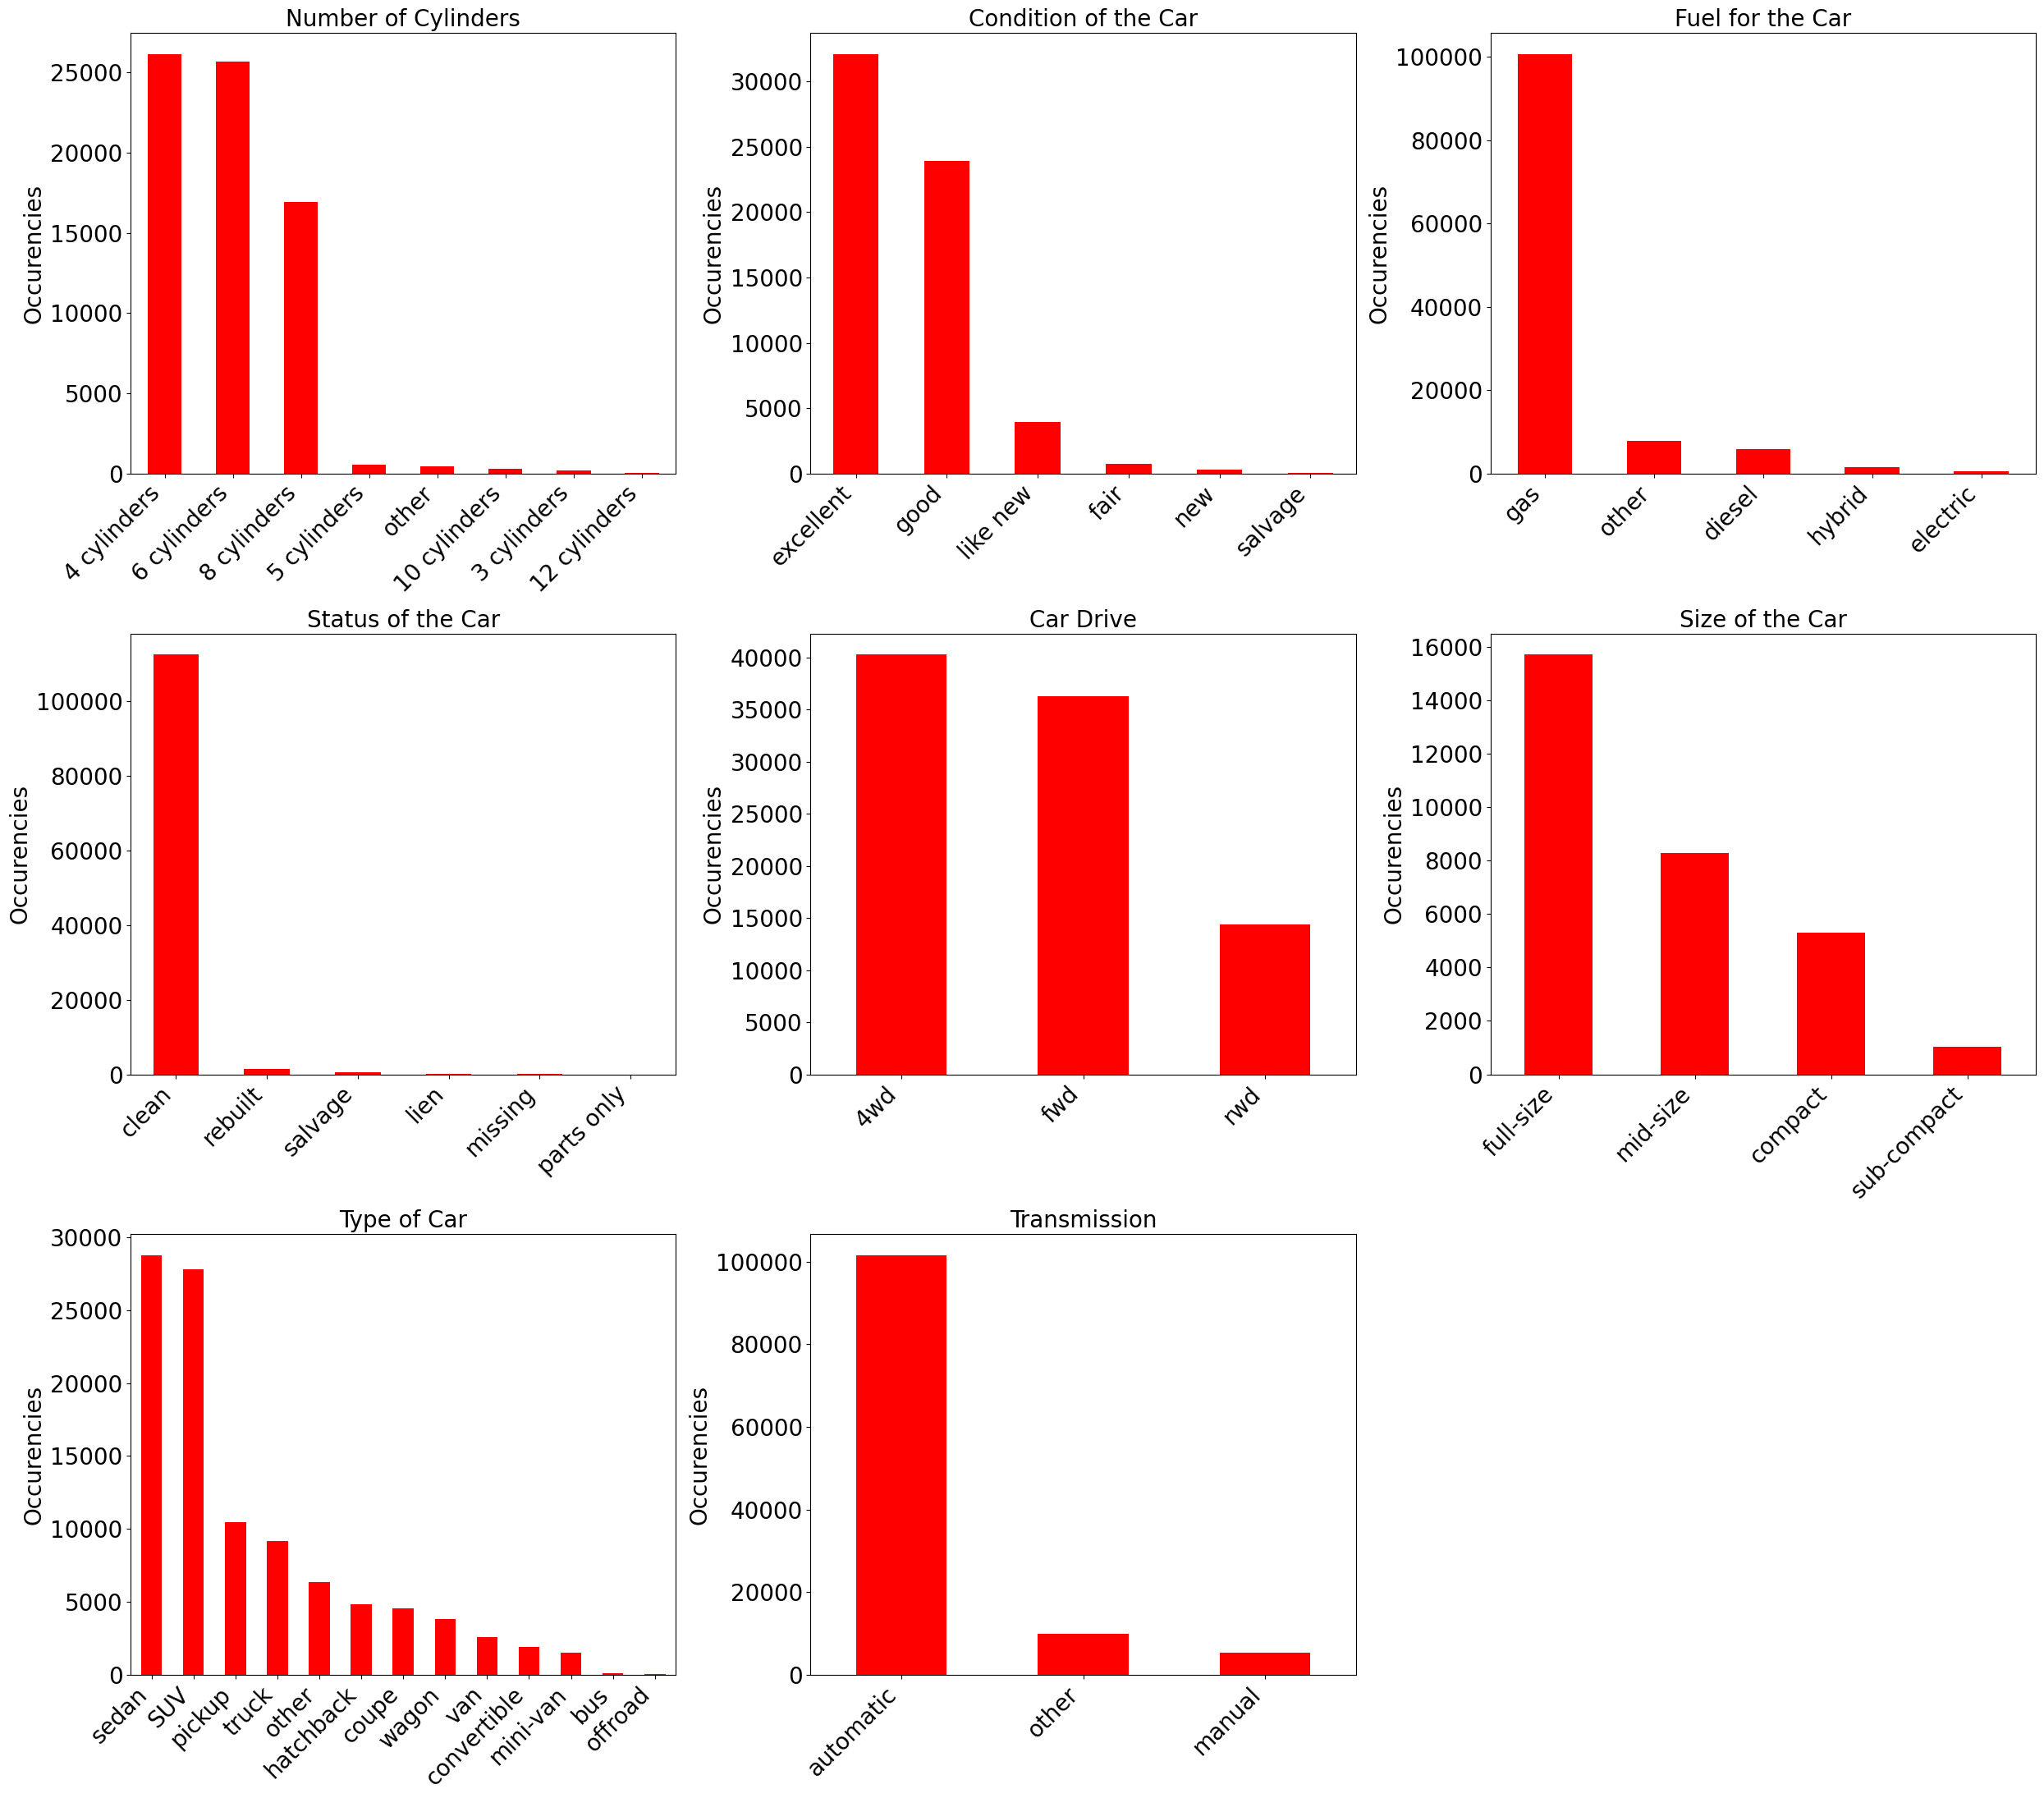

In [17]:
plt.figure(figsize=(25, 22))

#Cylinders
plt.subplot(3,3,1)
plt1 = df.cylinders.value_counts().plot(kind='bar', color='red')
plt.title('Number of Cylinders', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Condition
plt.subplot(3,3,2)
plt1 = df.condition.value_counts().plot(kind='bar', color='red')
plt.title('Condition of the Car', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Fuel
plt.subplot(3,3,3)
plt1 = df.fuel.value_counts().plot(kind='bar', color='red')
plt.title('Fuel for the Car', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Status
plt.subplot(3,3,4)
plt1 = df.title_status.value_counts().plot(kind='bar', color='red')
plt.title('Status of the Car', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Drive
plt.subplot(3,3,5)
plt1 = df.drive.value_counts().plot(kind='bar', color='red')
plt.title('Car Drive', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Size
plt.subplot(3,3,6)
plt1 = df['size'].value_counts().plot(kind='bar', color='red')
plt.title('Size of the Car', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Type
plt.subplot(3,3,7)
plt1 = df.type.value_counts().plot(kind='bar', color='red')
plt.title('Type of Car', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Transmission
plt.subplot(3,3,8)
plt1 = df.transmission.value_counts().plot(kind='bar', color='red')
plt.title('Transmission', fontsize=20)
plt1.set_ylabel(ylabel='Occurencies', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

plt.tight_layout()

plt.show()

Text(0, 0.5, 'Brand')

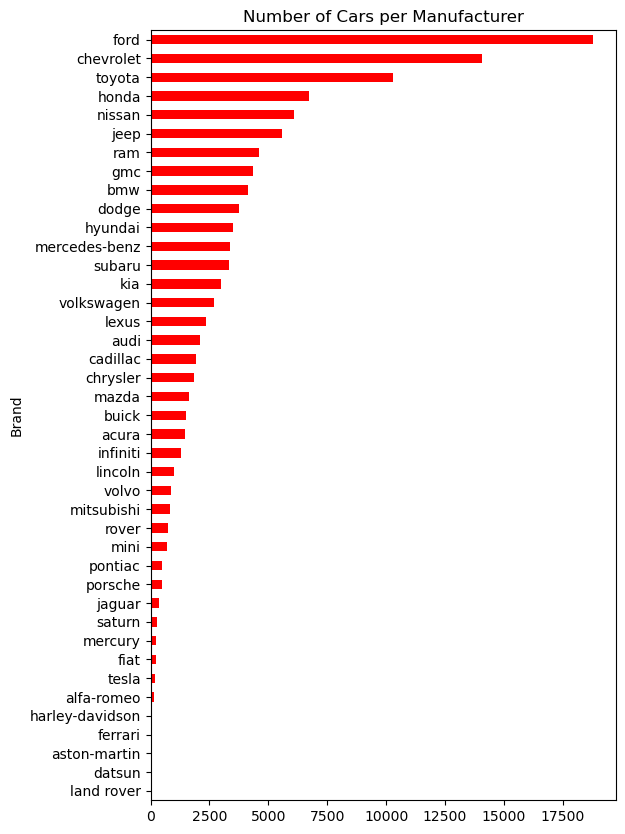

In [18]:
fig = plt.subplots(figsize =(6, 10))

plt1 = df.manufacturer.value_counts().sort_values(ascending=True).plot(kind='barh', color='red')
plt.title('Number of Cars per Manufacturer')
plt1.set_ylabel(ylabel='Brand')
#plt.yticks(fontsize=20)
#plt.xticks(rotation=45, fontsize=20);

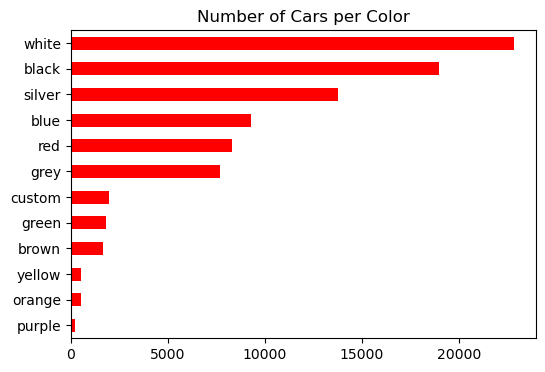

In [19]:
plt.figure(figsize=(6, 4))

plt.subplot(1,1,1)
plt1 = df.paint_color.value_counts().sort_values(ascending=True).plot(kind='barh', color='red')
plt.title('Number of Cars per Color')

plt.show()

The above visualization gives an indication about a possible approach to manage the columns with missing values.

- `size`: drop column

    Very relevant percentage of missing values (74%). I consider the amount of missing information too big to be reconstructed. Also, I believe that part of this information could be somehow found under the 'type' column. I decide to drop the whole column.
---
- `condition`: drop NaN

    Relevant percentage of missing values (48%). I don't see a clear trend in the histogram (many 'excellent and 'good') so I am afraid of adding an unwanted bias if I replace the missing values with the most common one ('excellent'). I accept to lose half of the dataset and I drop the rows with missing values. I expect `condition` a key factor in the car price, so I don't want either to drop the whole column or to work with bad reconstructed values.
---
- `cylinders`: drop NaN

    Relevant percentage of missing values (40%). Same considerations of the previous point: I cannot see a clear predominance (4, 6, 8 cylinders very popular) and I am afraid to add a bias. I accept to lose a significant part of the dataset and I drop rows with missing values.
---
- `paint_color`: fill NaN

    Relevant percentage of missing values (25%). However I believe the color of the car is not the most important factor when buying a second-hand car. Therefore I would try to save all the rows by replacing the missing values with the label 'Unknown'. It will be likely white, black or silver, but maybe the information is not available yet.
---
- `drive`: fill NaN

    Relevant percentage of missing values (23%). In this case the visualization helps. The most common cathegory is '4wd' (around 40k vehicles) and looking at the 'type' feature i see around the same value if a sum the main 'potential' 4wd types (SUV, pickup, truck). The idea is to fill the missing value based on the 'type' feature. This would also suggests a strong correlation of this feature...
---
- `type`: drop NaN

    Relatively limited percentage of missing values (14%). I consider the type of car an important feature so I prefer to remove rows without this feature.
---
- `fuel`: fill NaN

    Very low percentage of missing values (1.4%), but it can be safely filled by 'gas' value.
---
- `transmission`: fill NaN

    Very low percentage of missing values (1%), but it can be safely filled by 'automatic' value.
---
- `title_status`: drop NaN

    Very low percentage of missing values (3%). However almost all the cars are under 'clean' group. I'm very tempted to get rid of this column, but I eventually decide to keep it and drop NaN values.
---
- `year, manufacturer, model,odometer`: drop NaN

    These features present a very limited number of missing values. Dropping or replacing the incomplete rows shouldn't make a huge difference, so I choose the easiest option and I drop them. Regarding `manufacturer` some values are weird (Harley Davidson is not a car maker) or very limited: this could be solved by filtering brands whith less than 100 units in the dataset.
---
- `id`, `VIN`: drop column

    Unique values for every row, they don't provide much information.
---
- `region`, `state`: drop columns

    Said features have lost importance after removing the duplicates of VIN.

In [20]:
#Fill NaN with mode()
df['fuel'].fillna(df['fuel'].mode().to_string(), inplace = True)
df['transmission'].fillna(df['transmission'].mode().to_string(), inplace = True)
df['transmission'].replace('0    automatic', 'automatic', inplace = True)

In [21]:
#Managing NaN of 'drive' feature
def drive_filler (type_car):
    
    if type_car in ['SUV', 'pickup', 'truck', 'offroad']:
        return '4wd'
    
    elif type_car in ['sedan', 'other', 'hatchback', 'wagon', 'van', 'mini-van']:
        return 'fwd'
    
    else: #in case of ['coupe', 'convertible', 'bus']
        return 'rwd'

In [22]:
df['drive'] = df.apply(lambda x: drive_filler(x['type']) if pd.isnull(x['drive']) else x['drive'], axis=1)

In [23]:
#Managing NaN of 'paint_color' feature
df['paint_color'] = df.apply(lambda x: 'Unknown' if pd.isnull(x['paint_color']) else x['paint_color'], axis=1)

In [24]:
#Unused features: drop columns
df = df.drop(['id', 'VIN', 'region', 'state', 'size'], axis=1)

In [25]:
#Filter of 'niche' manufacturers (<100 units)
df = df[df['manufacturer'].isin(df['manufacturer'].value_counts()[df['manufacturer'].value_counts() > 100].index)]

In [26]:
#Drop NaN rows
df = df.dropna(subset=['year', 'manufacturer', 'model', 'odometer', 'title_status', 'condition', 'cylinders', 'type']) 

Status of dataset after the cleaning

In [27]:
#Percentage of NAN values (%) after managing NaN values
df.isna().sum() / df.shape[0] * 100

price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
dtype: float64

In [28]:
#Number of rows left after managing NaN values
df.shape[0]

38531

In [29]:
#Copy of the cleaned dataset before the encoding
#df_cleaned = df

#### 2.3 Analysis of Numerical Features and Treatment of Outliers
Numerical features are: `price`, `odometer` and `year`

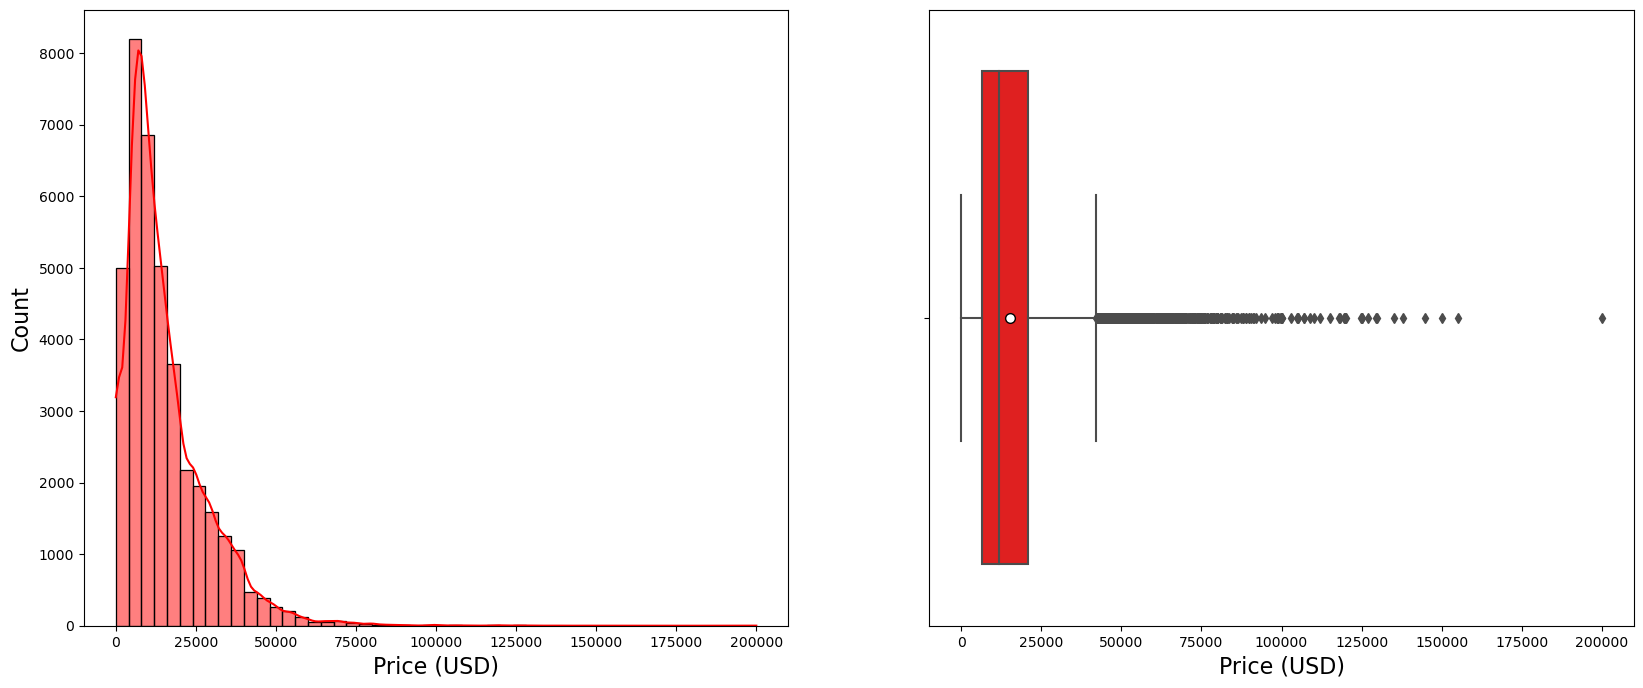

In [30]:
#Distribution of 'price'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=50, ax=axes[0])
ax.set_xlabel('Price (USD)',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('Price (USD)',fontsize=16)

plt.show()

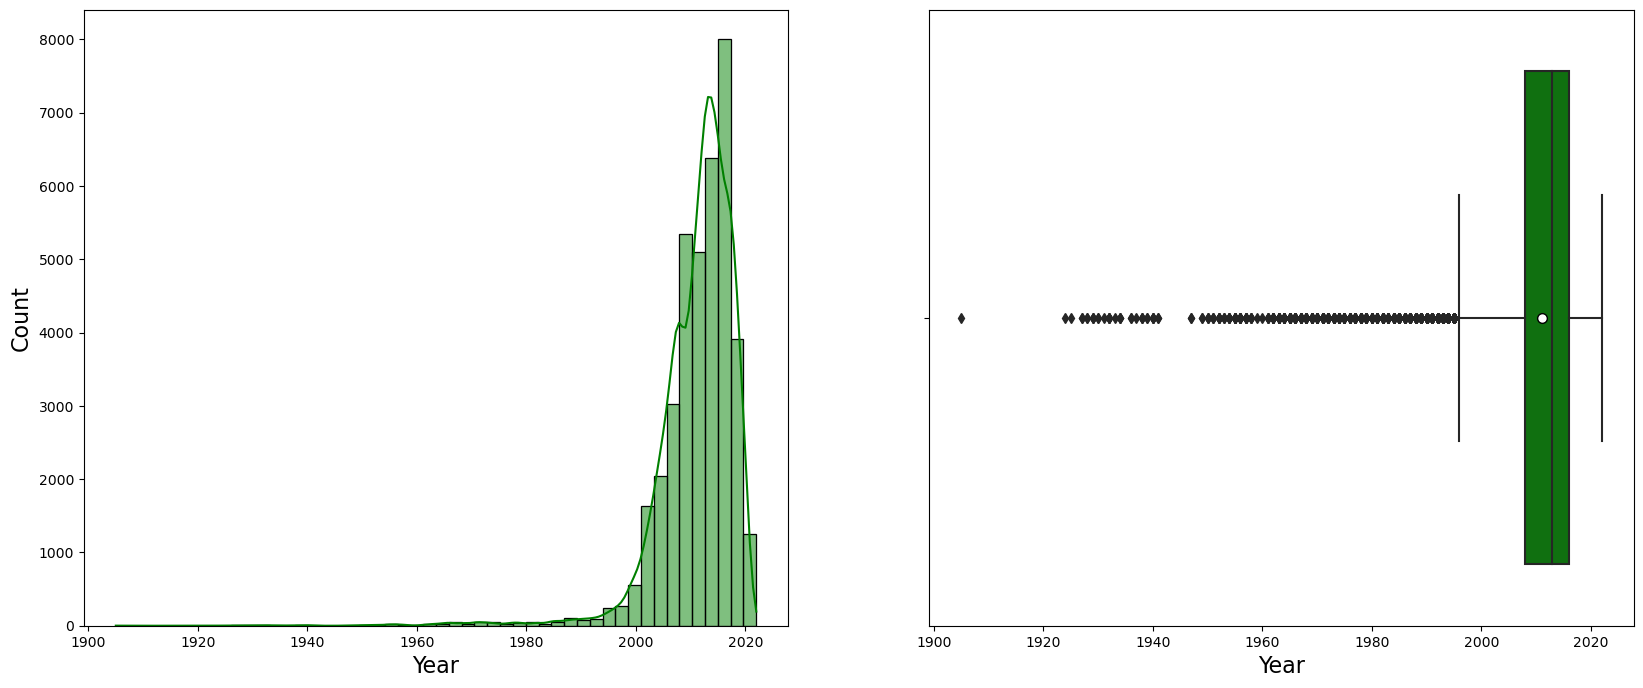

In [31]:
#Distribution of 'year'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax=sns.histplot(data=df, x="year",kde=True, color="green",bins=50, ax=axes[0])
ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('Year',fontsize=16)

plt.show()

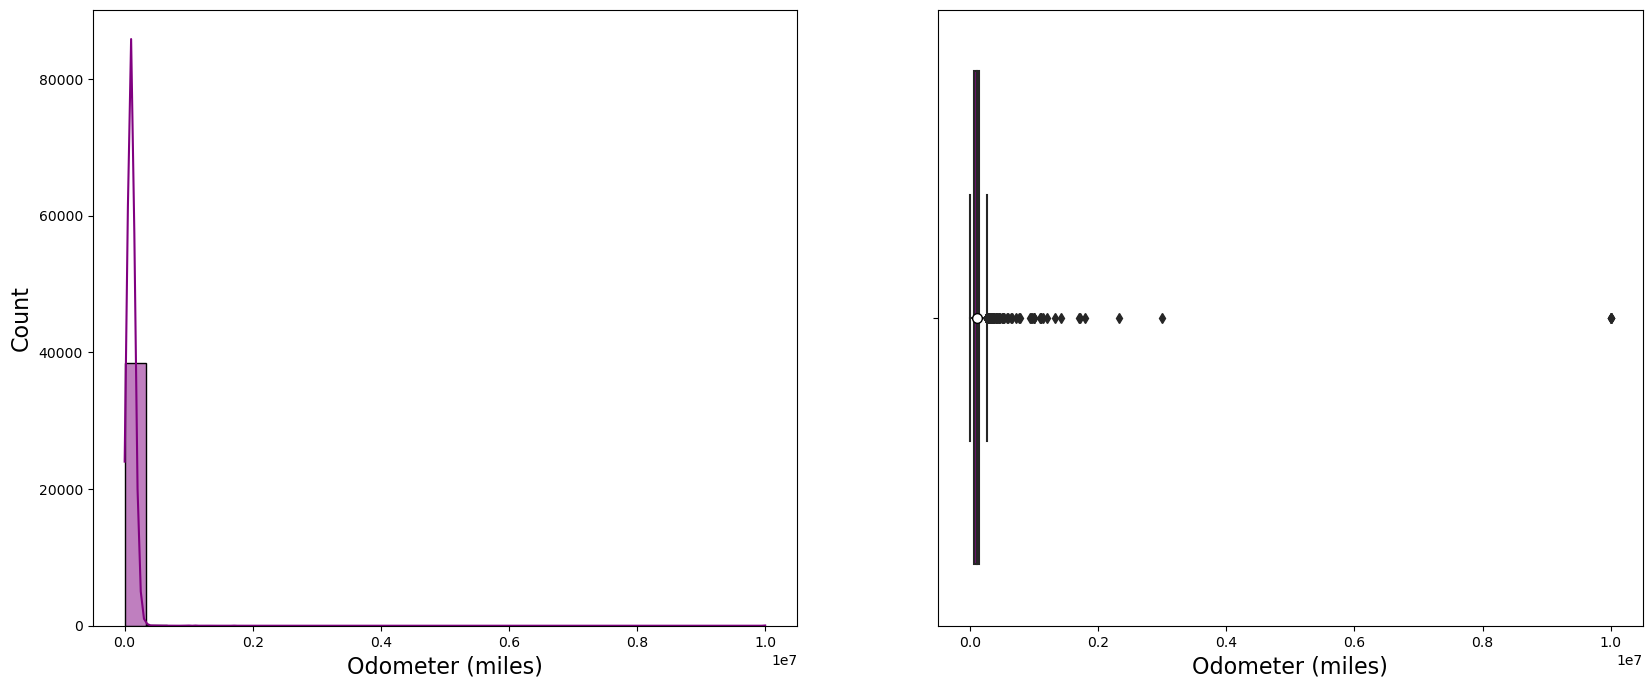

In [32]:
#Distribution of 'odometer'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="purple",bins=30, ax=axes[0])
ax.set_xlabel('Odometer (miles)',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="purple")
ax.set_xlabel('Odometer (miles)',fontsize=16)

plt.show()

In [33]:
#Function to filter outliners in the numeric features
def outliers_manager(data,variable):
    first_quartile=data[variable].quantile(0.25)
    third_quartile=data[variable].quantile(0.75)
    iqr = third_quartile - first_quartile
    
    lower = first_quartile - 1.5*iqr
    lower = 0 if lower<0 else lower
    
    upper = third_quartile + 1.5*iqr
    upper = 0 if upper<0 else upper
    
    print(lower,upper)
    data=data[(data[variable] < upper) &  (data[variable] > lower)]
    return data

In [34]:
variables=['price', 'odometer', 'year']

In [35]:
for variable in variables:
    df = outliers_manager(df,variable)

0 42041.25
0 257500.0
1997.5 2025.5


The numerical features are visualized again, without outliners.

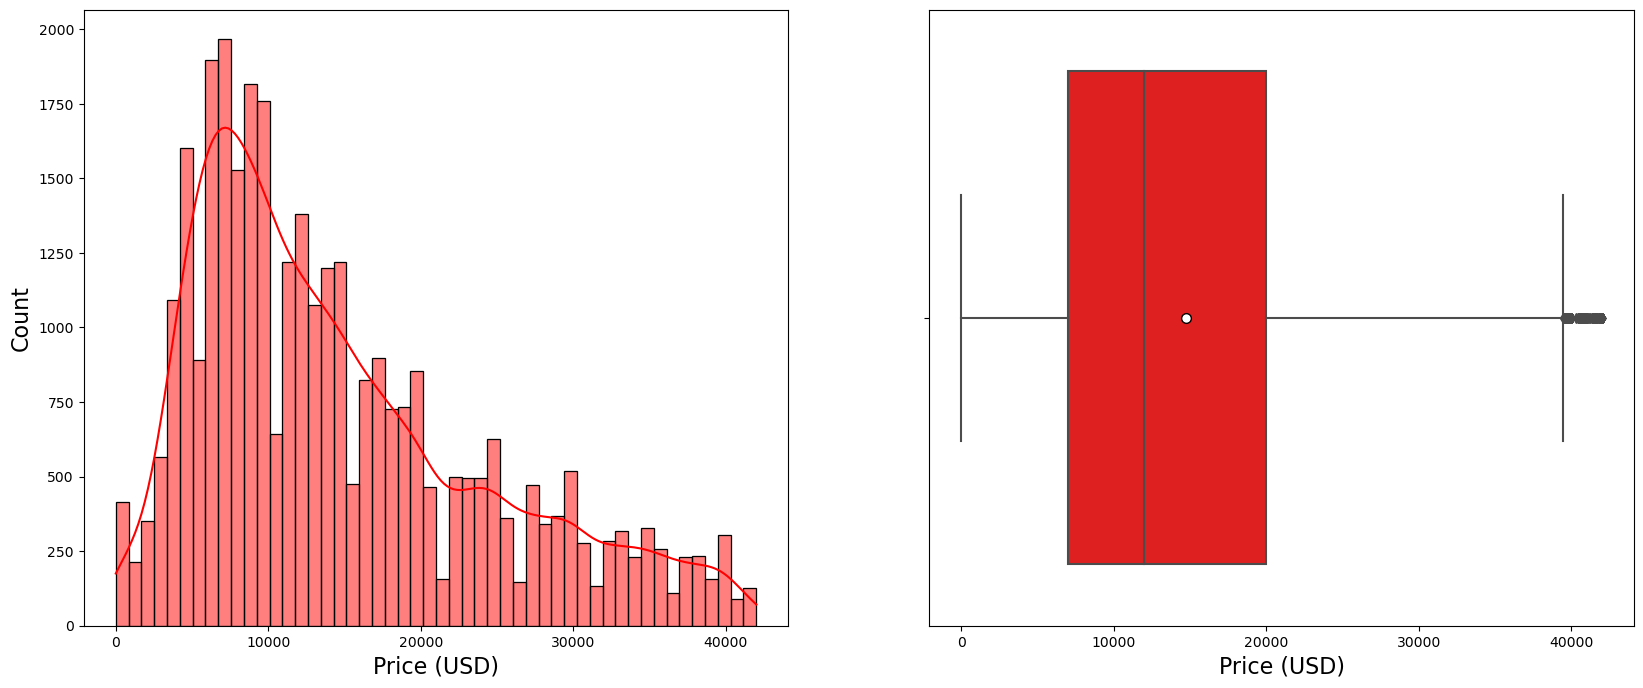

In [36]:
#Distribution of 'price' (without outliners)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=50, ax=axes[0])
ax.set_xlabel('Price (USD)',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('Price (USD)',fontsize=16)

plt.show()

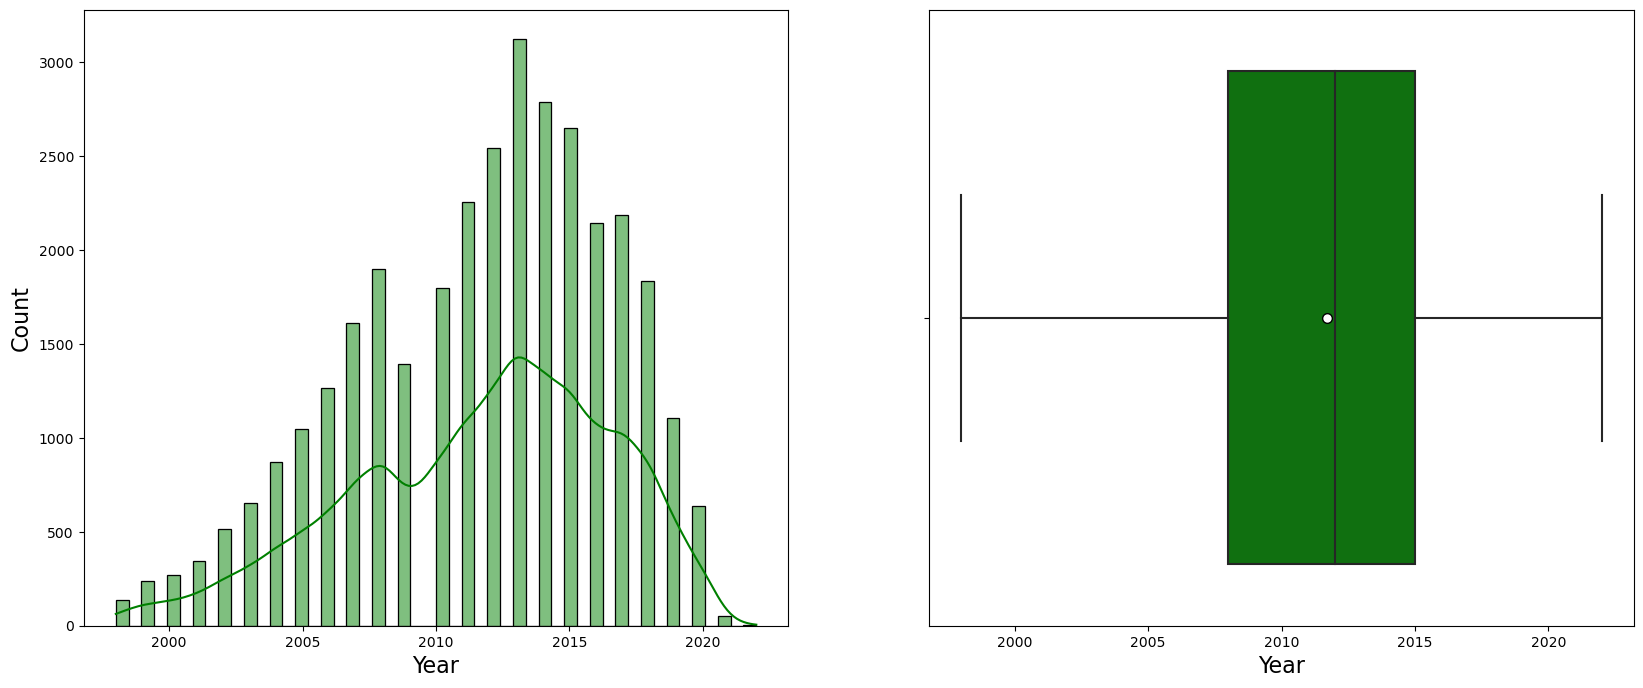

In [37]:
#Distribution of 'year' (without outliners)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax=sns.histplot(data=df, x="year",kde=True, color="green",bins=50, ax=axes[0])
ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["year"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="green")
ax.set_xlabel('Year',fontsize=16)

plt.show()

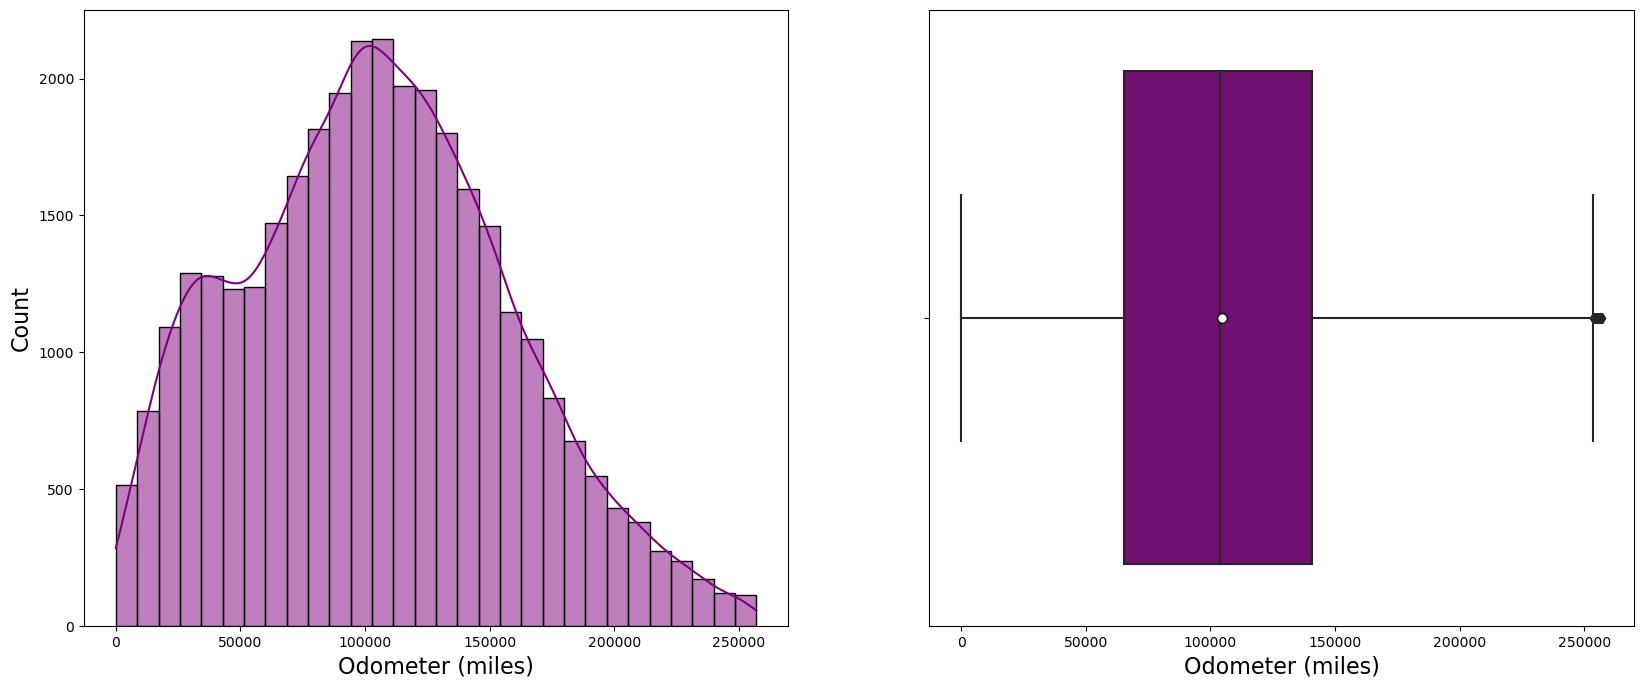

In [38]:
#Distribution of 'odometer' (without outliners)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax=sns.histplot(data=df, x="odometer",kde=True, color="purple",bins=30, ax=axes[0])
ax.set_xlabel('Odometer (miles)',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["odometer"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="purple")
ax.set_xlabel('Odometer (miles)',fontsize=16)

plt.show()

Looking at the `price` graph, I see there are some cars extremely cheap (close to 0 USD). Before further proceeding, I decide to inspect a group of very cheap cars (< 1k$) to see if the items seem reasonable.

In [39]:
df[df['price']<1000].sort_values('price', ascending=True)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
100706,1,2017.0,nissan,maxima,excellent,10 cylinders,gas,34888.0,clean,other,4wd,sedan,black
92390,1,2018.0,nissan,pathfinder,excellent,10 cylinders,gas,51856.0,clean,automatic,4wd,wagon,grey
100707,1,2019.0,dodge,challenger,excellent,10 cylinders,gas,35228.0,clean,other,4wd,coupe,grey
100708,1,2017.0,mercedes-benz,e-class,excellent,10 cylinders,gas,48178.0,clean,other,4wd,sedan,silver
100709,1,2018.0,dodge,charger,excellent,10 cylinders,gas,42664.0,clean,other,4wd,sedan,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235668,999,2009.0,volvo,c30,salvage,4 cylinders,gas,146000.0,clean,automatic,fwd,hatchback,black
33876,999,2012.0,kia,optima,like new,4 cylinders,gas,87836.0,clean,automatic,fwd,sedan,black
109776,999,2001.0,ford,expedition eddie bauer,excellent,8 cylinders,gas,123554.0,clean,automatic,rwd,SUV,white
108905,999,2009.0,ford,focus,excellent,4 cylinders,gas,95120.0,clean,automatic,fwd,sedan,black


Some rows are totally unrealistic: e.g. a Mercedes E-class (2017) in excellent condition sold for 1 dollar (according to Carvana, similar models are worth >20k USD). After few iterations, I decide to filter all the rows with a price under 2k USD.

In [40]:
df = df[df['price'] > 2000]

In [41]:
#Visualization of the cheapest models after filtering cars <2k USD
df.sort_values('price', ascending=True).head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
151307,2050,2004.0,honda,odyssey exl,good,6 cylinders,gas,210049.0,clean,automatic,fwd,mini-van,grey
213874,2100,2002.0,chrysler,voyager,good,6 cylinders,gas,156400.0,clean,automatic,fwd,mini-van,white
342339,2100,2004.0,honda,pilot,fair,6 cylinders,gas,223000.0,clean,automatic,fwd,SUV,black
408886,2100,1999.0,mercedes-benz,ml320,fair,6 cylinders,gas,232100.0,clean,automatic,4wd,SUV,green
379431,2100,2006.0,ford,crown victoria p71,fair,8 cylinders,gas,93085.0,clean,automatic,rwd,sedan,white


There is still a Mercedes on the lowest side of the spectrum, but this time it's an old model (1999), in fair condition and with more than 230k miles. Cheap items now seem more reasonable.

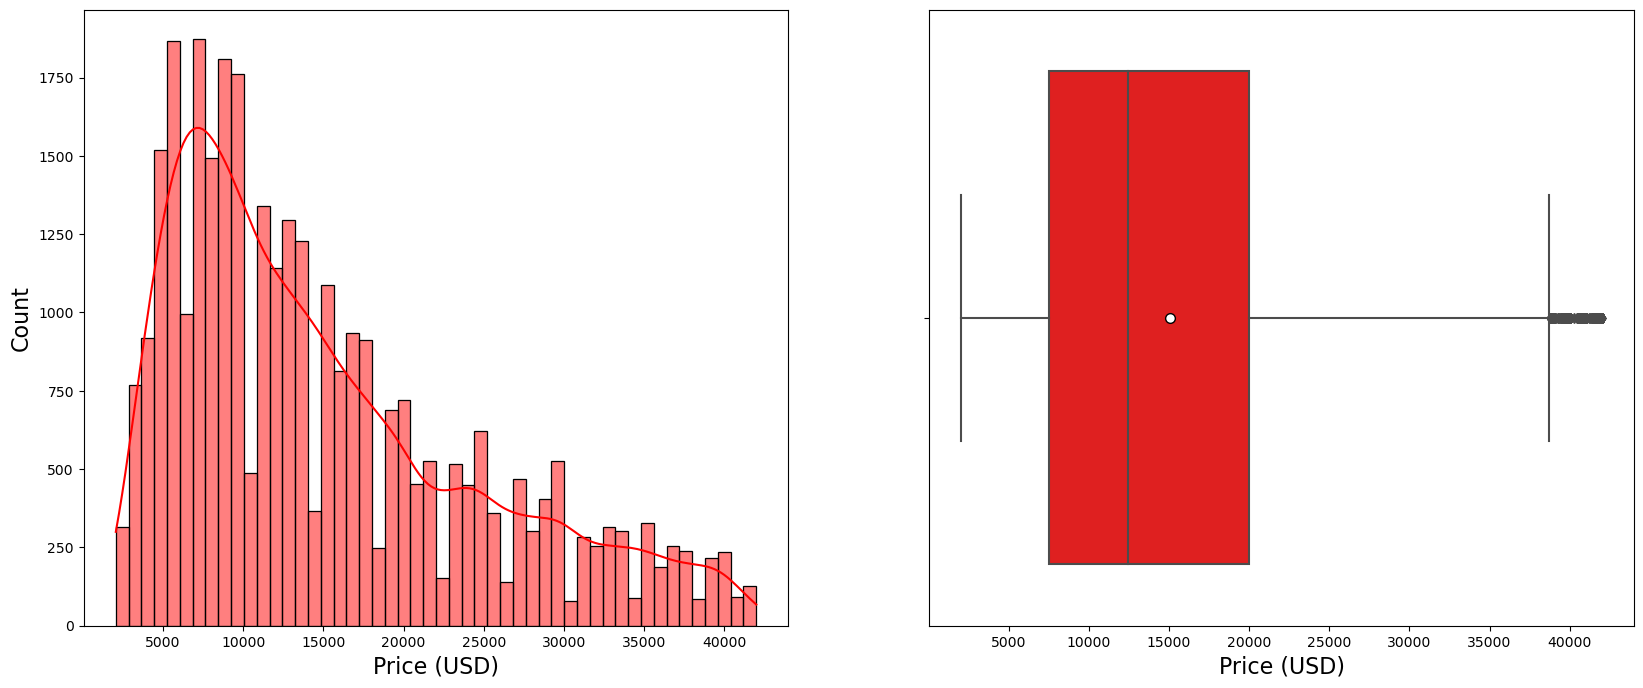

In [42]:
#Distribution of 'price' (without outliners and rows under 2k USD)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax=sns.histplot(data=df, x="price",kde=True, color="red",bins=50, ax=axes[0])
ax.set_xlabel('Price (USD)',fontsize=16)
ax.set_ylabel('Count',fontsize=16)

ax = sns.boxplot(x=df["price"],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},ax=axes[1], color="red")
ax.set_xlabel('Price (USD)',fontsize=16)

plt.show()

The `price` feature looks very right-skewed (positively-skewed). A 'log' transformation will be applied before the modeling phase, to improve the skewness.

In [43]:
#Check of the length of the Dataset after removing outliners in numeric features
df.shape

(32583, 13)

Final Statistics after removing outliers in numeric columns:

In [44]:
df['price'].describe()

count    32583.000000
mean     15046.789706
std       9510.721715
min       2050.000000
25%       7500.000000
50%      12450.000000
75%      19998.000000
max      42000.000000
Name: price, dtype: float64

In [45]:
np.round(df['odometer'].describe(), 2)

count     32583.00
mean     104458.90
std       53056.72
min           1.00
25%       65553.50
50%      103540.00
75%      140052.50
max      257000.00
Name: odometer, dtype: float64

In [46]:
df['year'].describe()

count    32583.000000
mean      2011.730105
std          4.802944
min       1998.000000
25%       2008.000000
50%       2012.000000
75%       2015.000000
max       2022.000000
Name: year, dtype: float64

#### 2.4 Visualization of the Data

Before encoding the non-numerical features and shifting to the modeling phase, a visualization of the 'cleaned' dataset is provided.

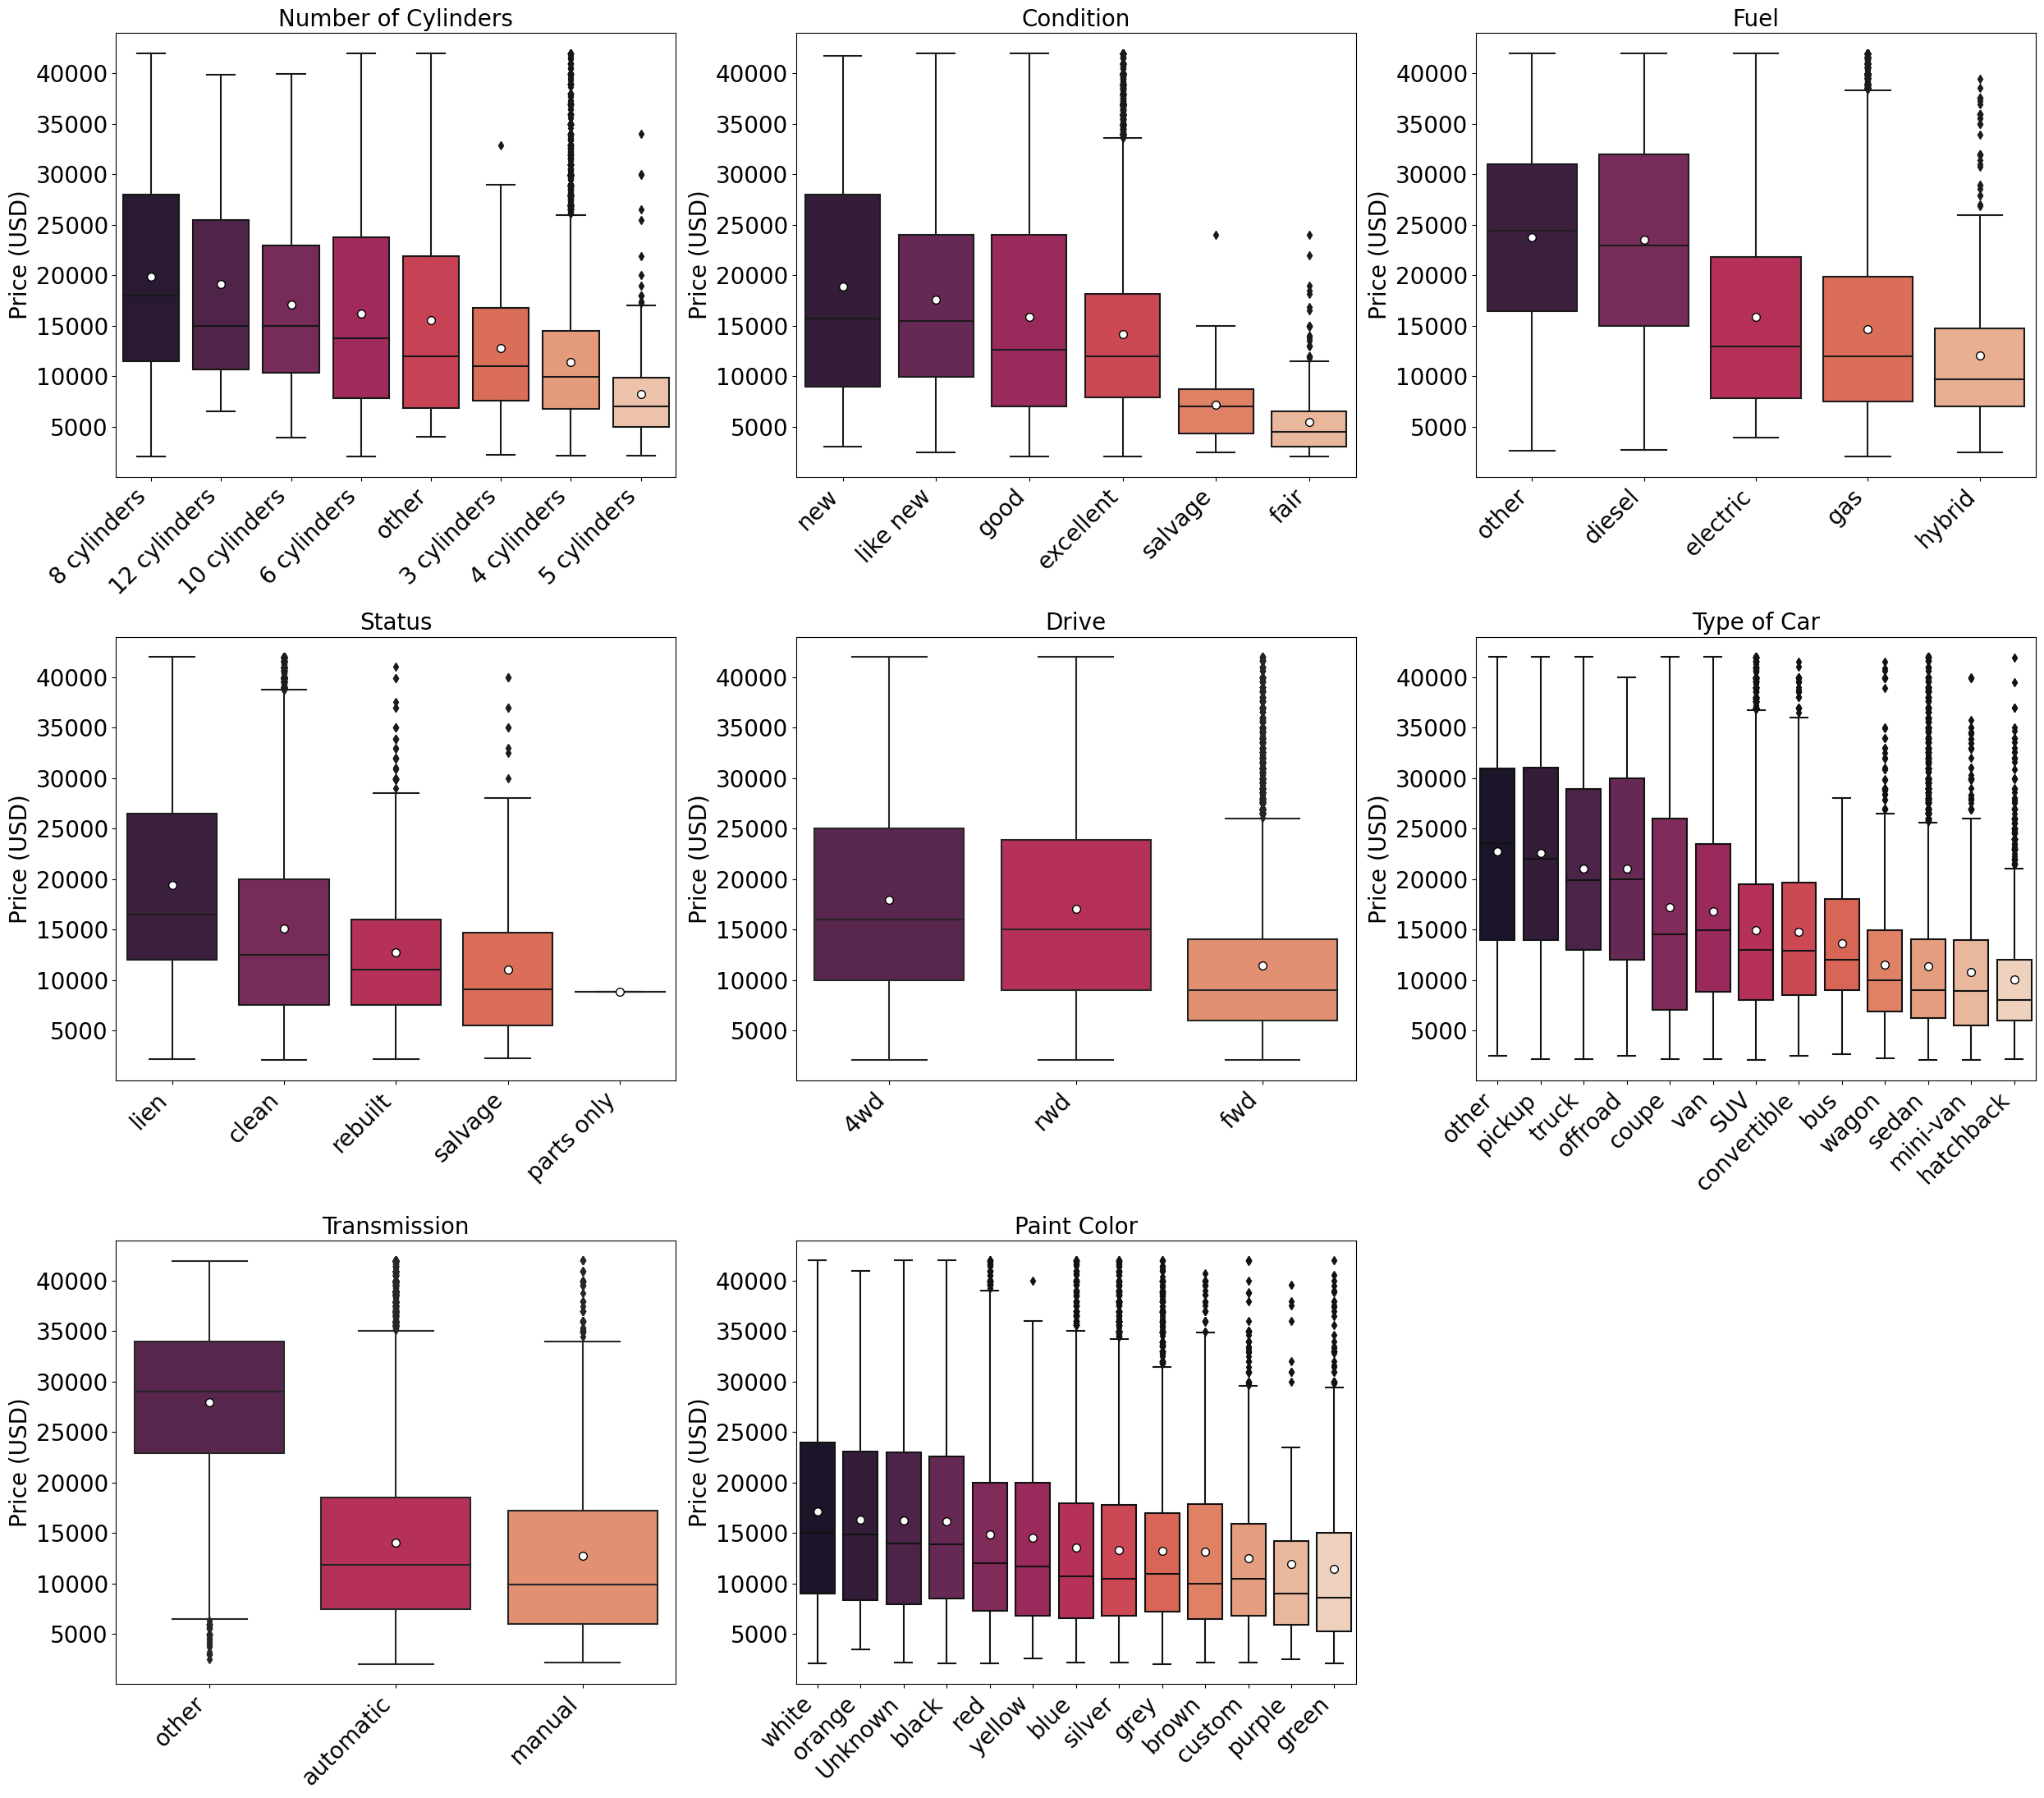

In [47]:
sns.color_palette('rocket')

plt.figure(figsize=(25, 22))

#Cylinders
plt.subplot(3,3,1)
plt1 = plt.subplot(3,3,1)
mean_values = df.groupby('cylinders')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.cylinders, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Number of Cylinders', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Condition
plt.subplot(3,3,2)
mean_values = df.groupby('condition')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.condition, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Condition', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Fuel
plt.subplot(3,3,3)
mean_values = df.groupby('fuel')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.fuel, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Fuel', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Status
plt.subplot(3,3,4)
mean_values = df.groupby('title_status')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.title_status, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Status', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Drive
plt.subplot(3,3,5)
mean_values = df.groupby('drive')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.drive, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Drive', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Type
plt.subplot(3,3,6)
mean_values = df.groupby('type')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.type, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Type of Car', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Transmission
plt.subplot(3,3,7)
mean_values = df.groupby('transmission')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.transmission, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Transmission', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

#Paint Color
plt.subplot(3,3,8)
mean_values = df.groupby('paint_color')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.paint_color, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Paint Color', fontsize=20)
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=45, fontsize=20, horizontalalignment='right')

plt.tight_layout()

plt.show()

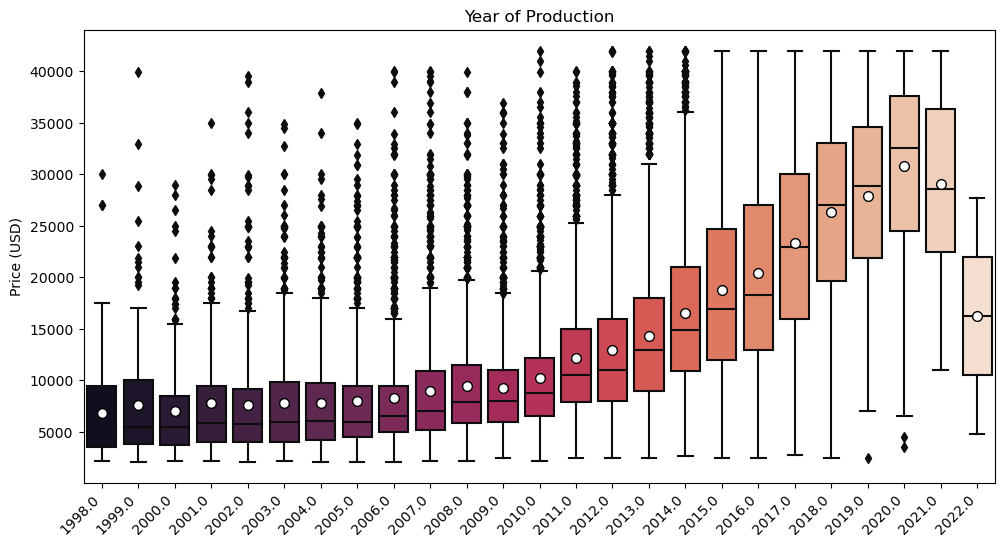

In [48]:
#Year of Production
plt.figure(figsize=(40, 20))

plt.subplot(3,3,1)
plt1 = plt.subplot(3,3,1)
#mean_values = df.groupby('year')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.year, y=df.price, palette=("rocket"),
                   #order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Year of Production')
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)')
plt.xticks(rotation=45, horizontalalignment='right');

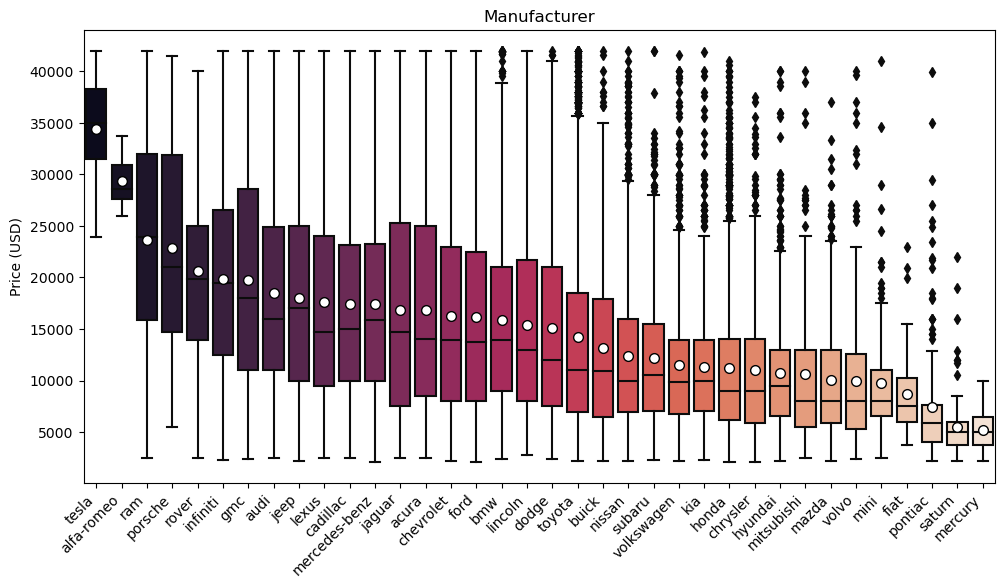

In [49]:
#Manufacturers
plt.figure(figsize=(40, 20))

plt.subplot(3,3,1)
plt1 = plt.subplot(3,3,1)
mean_values = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df.manufacturer, y=df.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Manufacturer')
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)')
plt.xticks(rotation=45, horizontalalignment='right');

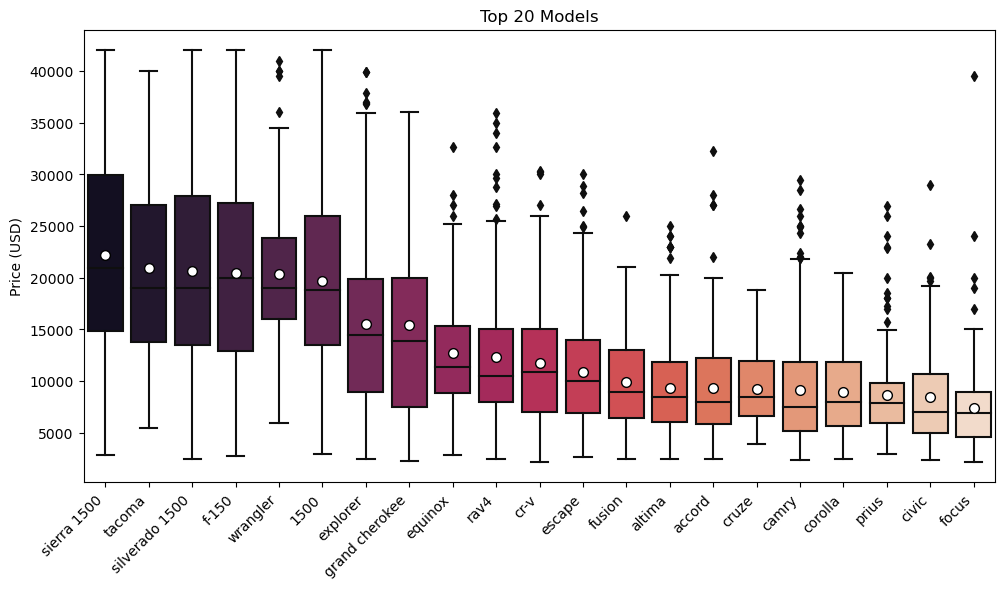

In [50]:
#Top 20 Models
df_top = df[df['model'].isin(df.model.value_counts()[:21].index)]

plt.figure(figsize=(40, 20))

plt.subplot(3,3,1)
plt1 = plt.subplot(3,3,1)
mean_values = df_top.groupby('model')['price'].mean().sort_values(ascending=False)
plt1 = sns.boxplot(x=df_top.model, y=df_top.price, palette=("rocket"),
                   order = mean_values.index,
                   showmeans=True,
                   meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black","markersize":"7"})
plt.title('Top 20 Models')
plt1.set_xlabel(xlabel=None)
plt1.set_ylabel(ylabel='Price (USD)')
plt.xticks(rotation=45, horizontalalignment='right');

After cleaning the dataset, the visualization of the features in function of the `price` concludes the EDA. All the following considerations are based on average price values.

`year` looks a key feature. Price seems to decay esponentially increasing the age of the car.

`condition` shows a relevant distinction between the 'good' states (new, like new, good and excellent) and 'bad' states.

`manufacturer` presents several brands, each one even with a significant price variance. However, the most expensive brands agree with other features below. E.g. 'ram' and 'gmc' agree with 'truck' and 'pickup' as the most expensive types of cars, under feature `type`. Same for 'alfa-romeo' and 'porsche' with type 'coupe'.

`model` allows to identify the most expensive cars. Considering the top 20 models, in terms of availability, the most expensive ones are the 'sierra 1500', 'tacoma', 'silverado 1500' and 'f-150'. All these models are big-sized trucks.

`cylinders`suggest a division into 2 groups: less than 6 cylinders, and 6 or more cylinders. 

`fuel` indicates that diesel vehicles are more expensive.

`title_status` indicates that 'clean' and 'lien' vehicles are more expensive. I think that the 'lien' vehicles are more expensive because they are usually in `condition` 'new' or 'like new'. Almost all the cars in the dataset are under 'clean'condition.

`transmission` has the vast majority of vehicles under 'automatic' group. The definition of 'other' is not clear: however it is a small group and it is made mainly by expensive cars with automatic transmission.

`drive` fwd is the cheapest group. This is because it's usually the drive mounted on sedan or small cars. More expensive cars in the dataset, trucks and sport cars, come with 4wd and rwd, respectively.

`type` suggests that big trucks and pickups are the most expensive cars in the dataset.

`paint_color` doesn't suggest a clear tendency. The more standard colors (white, black and 'unknown') seems slighly more expensive, because more requested.

### 3. Data Preparation

#### 3.1 Applying 'log' transformation to price feature

As observed in point 2.3, `price` feature exhibits a relevant positive-skewed shape.

In [51]:
df['price'].agg(['skew'])

skew    0.934817
Name: price, dtype: float64

In [52]:
#Log transformation to improve skewness of 'price'
df['price'] = np.log(df['price'])

In [53]:
df['price'].agg(['skew'])

skew   -0.136012
Name: price, dtype: float64

#### 3.2 Encoding Categorical Features

In [54]:
#Copy of the cleaned dataset before the encoding of cathegorical features
df_cleaned = df

In [55]:
te = TargetEncoder()
encoded_df = te.fit_transform(df[['manufacturer', 'model', 'cylinders', 'fuel', 'title_status',
                                  'transmission', 'drive', 'type', 'paint_color']], df['price'])

In [56]:
#Replacing old categorical features
df = df.drop(['manufacturer', 'model', 'cylinders', 'fuel', 'title_status',
         'transmission', 'drive', 'type', 'paint_color'], axis = 1)
df = pd.concat([df, encoded_df], axis = 1)
df.shape

(32583, 13)

In [57]:
#Converting 'condition' to numeric scale (from 1=salvage to 6=new)
df["condition"].replace({"new" : 6, "like new" : 5, "excellent" : 4, "good" : 3, "fair" : 2, "salvage" : 1}, inplace = True)
df["condition"] = df["condition"].astype(int)

#### 3.3 Skewness of the Features

The good result of the analysis also depends on the simmetry of the features. A parameter to quantify this the 'skew': ideally normally distributed variables have a skew close to 0.

In [58]:
df.agg(['skew']).T

,skew
price,-0.136012
year,-0.494739
condition,0.162198
odometer,0.225574
manufacturer,-0.290762
model,0.109576
cylinders,0.128006
fuel,4.176424
title_status,-3.180996
transmission,3.135870


Information of final dataset:

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32583 entries, 27 to 426746
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         32583 non-null  float64
 1   year          32583 non-null  float64
 2   condition     32583 non-null  int32  
 3   odometer      32583 non-null  float64
 4   manufacturer  32583 non-null  float64
 5   model         32583 non-null  float64
 6   cylinders     32583 non-null  float64
 7   fuel          32583 non-null  float64
 8   title_status  32583 non-null  float64
 9   transmission  32583 non-null  float64
 10  drive         32583 non-null  float64
 11  type          32583 non-null  float64
 12  paint_color   32583 non-null  float64
dtypes: float64(12), int32(1)
memory usage: 3.4 MB


#### 3.4 Correlation Analysis

The dataset is now fully numerical. This means that relations between variables and the output feature can be investigated by means of a correlation matrix.

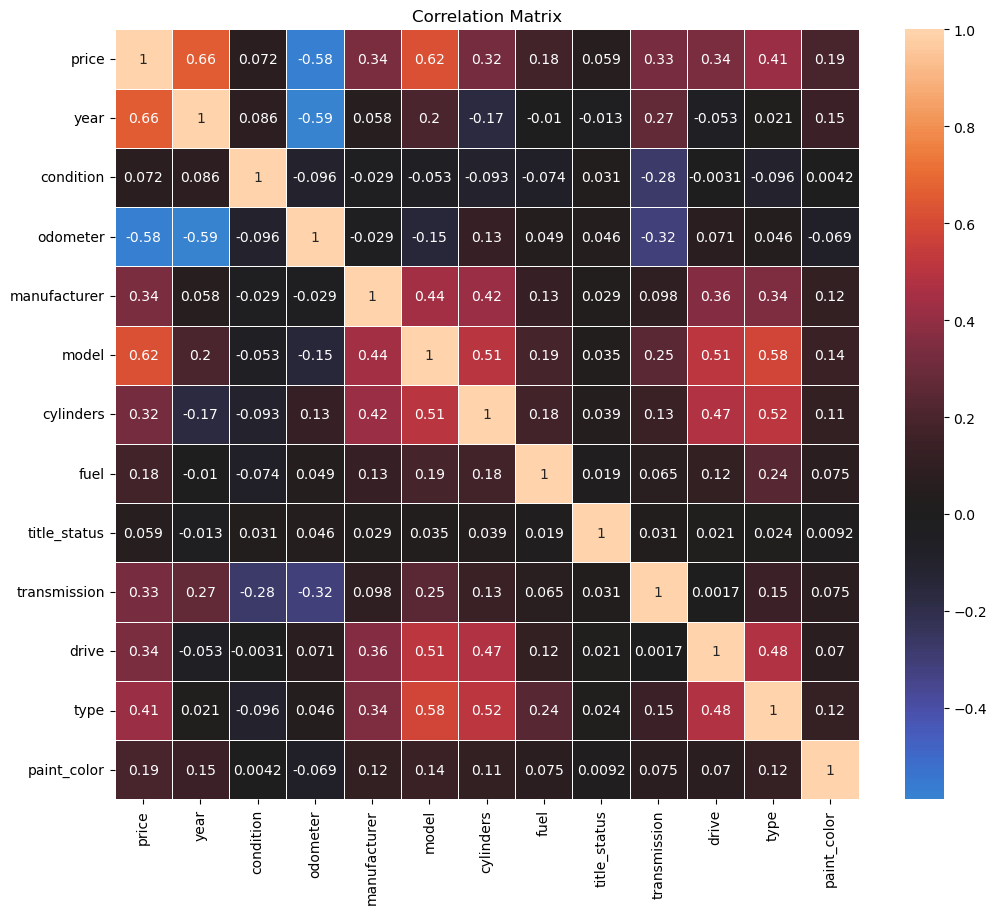

In [60]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), center = 0, linewidth = .5, annot = True).set(title='Correlation Matrix');

The correlation matrix (here visualized by means of a heatmap) highlights some relevant correlations and confirm some initial hypothesis.

Regarding the selling `price`:
- The strongest correlations are with `year`, `odometer`, `model` and `type`. There are good correlations even with technical features of the engine (`cylinders`, `transmission`, `drive`). The remaining features are not so correlated and confirm some of the preliminary hypothesis: `condition` (probably because almost all the items are in a good status), `fuel` (almost all vehicles have 'gas'), `title_status` (almost all vehicles are 'clean') and `paint color`.
- Other relevant correlations are between `year`-`odometer` (this definetly makes sense), `model`-`type`, `manufacturer`-`model`, or technical with the type of car (e.g. `cylinders`-`type`, `cylinders`-`drive`, `drive`-`type`...).

### 4. Modeling

Preliminary splitting of the dataset

In [61]:
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .3)

The following regressive models are evaluated:
- Linear Regression
- LASSO
- Ridge

#### 4.1 Linear Regression Model

In [62]:
#Training Linear Model
lr_model = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [63]:
#Measure performance of the model
lr_mse = mean_squared_error(lr_model.predict(X_test), y_test)
print(f"MSE of Linear Regression model is {np.round(lr_mse, 3)}")
print(f"R^2 of Linear Regression model is {np.round(r2_score(y_test, lr_model.predict(X_test)), 3)}")

MSE of Linear Regression model is 0.086
R^2 of Linear Regression model is 0.798


I use MSE and R^2 as parameters to evaluate the quality of the model. Mean Squared Error parameter is a quite common metric to evaluate the predictions of the model, since it strongly penalize any outliners. R^2 measures how much of the variation of a dependent variable `price` is explained in the regression model.

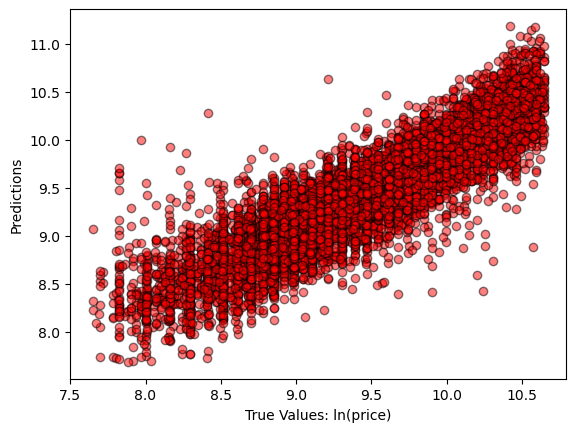

In [64]:
plt.scatter(y_test, lr_model.predict(X_test), c='red', alpha=0.5, edgecolors='black')

plt.xlabel('True Values: ln(price)')
plt.ylabel('Predictions')

plt.show()

#### 4.2 Linear Regression Model with Polynomial Features

The initial Linear Regression model is improved by adding a polynomial transformer. A Simple Cross Validation is implemented to find the polynomial degree of the best linear regression model. A function iterates through complexities from 1-5, builds a model with a degree of that complexity, and returns the model with the lowest test mean squared error.

The linear regression model with degree 3 provides the lowest MSE of 0.072, with a R^2 score of 0.83.

In [65]:
def simple_cross_validation(X_train, y_train, X_test, y_test):
    best_pipe = None
    best_mse = np.inf

    for degree in range(1, 6):
        pipe = Pipeline([
            ("poly", PolynomialFeatures(degree = degree, include_bias = False)),
            ("scaler", StandardScaler()),
            ("linRegr", LinearRegression())
        ])

        pipe.fit(X_train, y_train)
        
        test_mse = mean_squared_error(pipe.predict(X_test), y_test)

        if test_mse < best_mse:
            best_mse = test_mse
            best_pipe = pipe
            
    return best_pipe

In [66]:
best_lr_model = simple_cross_validation(X_train, y_train, X_test, y_test)
best_lr_model.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=3, include_bias=False)),
  ('scaler', StandardScaler()),
  ('linRegr', LinearRegression())],
 'verbose': False,
 'poly': PolynomialFeatures(degree=3, include_bias=False),
 'scaler': StandardScaler(),
 'linRegr': LinearRegression(),
 'poly__degree': 3,
 'poly__include_bias': False,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'linRegr__copy_X': True,
 'linRegr__fit_intercept': True,
 'linRegr__n_jobs': None,
 'linRegr__positive': False}

In [67]:
lr3_mse = mean_squared_error(y_test, best_lr_model.predict(X_test))
print(f"MSE for Linear Regression model of degree 3 is {np.round(lr3_mse, 3)}")
print(f"R^2 for Linear Regression model of degree 3 is {np.round(r2_score(y_test, best_lr_model.predict(X_test)), 3)}")

MSE for Linear Regression model of degree 3 is 0.072
R^2 for Linear Regression model of degree 3 is 0.831


#### 4.3 LASSO Regression Model

After Linear Regression, I evaluate another regression, the LASSO model.

The LASSO model is optimized by means of GridSearchCV. The metric adopted is the minimum MSE (neg_mean_squared_error), with a 3 fold cross-validation. The hyperparameter to be optimized is the alpha coefficient of LASSO regressor.

The LASSO regression model with alpha = 0.0001 has the lowest MSE of 0.082, with a R^2 score of 0.81.

In [68]:
#Dictionary of alpha values for GridSearchCV
alphas = {"lasso__alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

In [69]:
#Defining the pipeline (polynominal 3 + scaler + LASSO)
lasso_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scaler", StandardScaler()),
    ("lasso", Lasso())
])

In [70]:
#GridSearchCV to find optimal alpha
lasso_grid = GridSearchCV(estimator = lasso_pipe,
                            param_grid = alphas,
                            scoring = "neg_mean_squared_error",
                            cv = 3)   

In [71]:
lasso_grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                          100.0]},
             scoring='neg_mean_squared_error')

In [72]:
lasso_grid.best_params_

{'lasso__alpha': 0.0001}

In [73]:
print(f"MSE for LASSO Regression model (alpha=0.0001) is {np.round(lasso_grid.best_score_, 3)}")
print(f"R^2 for LASSO Regression model (alpha=0.0001) is {np.round(r2_score(y_test, lasso_grid.predict(X_test)), 3)}")

MSE for LASSO Regression model (alpha=0.0001) is -0.082
R^2 for LASSO Regression model (alpha=0.0001) is 0.81


#### 4.4 Ridge Regression Model

The Ridge model is optimized by means of GridSearchCV. The metric adopted is the minimum MSE (neg_mean_squared_error), with a 3 fold cross-validation. The hyperparameter to be optimized is the alpha coefficient of the Ridge regressor.

The Ridge regression model with alpha = 0.0001 has the lowest MSE of 0.075, with a R^2 score of 0.833.

In [74]:
#Dictionary of alpha values for GridSearchCV
alphas = {"ridge__alpha" : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

In [75]:
#Defining the pipeline (polynominal 3 + scaler + Ridge)
ridge_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

In [76]:
#GridSearchCV to find optimal alpha hyperparameter 
ridge_grid = GridSearchCV(estimator = ridge_pipe,
                            param_grid = alphas,
                            scoring = "neg_mean_squared_error",
                            cv = 3)      

In [77]:
ridge_grid.fit(X, y) 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [78]:
ridge_grid.best_params_

{'ridge__alpha': 0.0001}

In [79]:
ridge_grid.best_score_

-0.07515734232454475

In [80]:
print(f"MAE for Ridge Regression model (alpha=0.0001) is {np.round(ridge_grid.best_score_, 3)}")
print(f"R^2 for Ridge Regression model (alpha=0.0001) is {np.round(r2_score(y_test, ridge_grid.predict(X_test)), 3)}")

MAE for Ridge Regression model (alpha=0.0001) is -0.075
R^2 for Ridge Regression model (alpha=0.0001) is 0.833


Among the regression models investigated, the Ridge model provides the best overall performance.
I try to plot an histogram with the difference between validation test data and the values predicted by the Ridge regression model. The histogram should have a gaussian distribution.

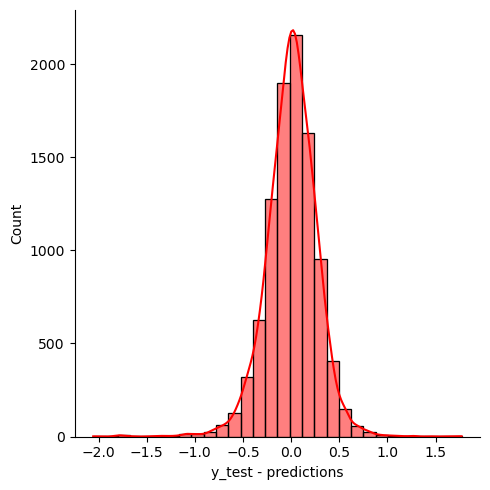

In [81]:
sns.displot(y_test-ridge_grid.predict(X_test), bins=30, kde=True, color='red')
plt.xlabel('y_test - predictions');

The distributon of validation test data and the values predicted by the Ridge regression model is also visualized by means of a scatter plot.

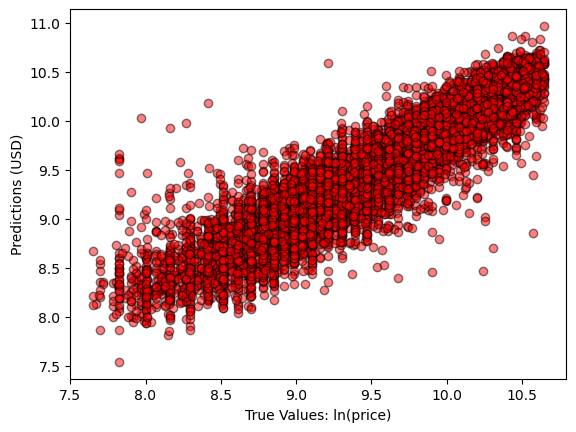

In [82]:
plt.scatter(y_test, ridge_grid.predict(X_test), c='red', alpha=0.5, edgecolors='black')

plt.xlabel('True Values: ln(price)')
plt.ylabel('Predictions (USD)')

plt.show()

#### 4.5 Ridge Regression Model with Revisited Encoding (One-Hot)

The previous models have been developed from a numerical encoding. I'd be interested to compare the results obtained by the previous models, with a model developed from a discrete encoding, One-Hot. Plus, I believe One-Hot encoding could provide additional information, in terms of quantifying the importance of specific labels, per each feature.

The regression model comes without any polynomial transformation, to extract coefficients.

The Ridge regression model with One-Hot encoding has MSE of 0.182, with a R^2 score of 0.841.

In [83]:
X = df_cleaned.drop('price', axis = 1)
y = df_cleaned['price']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .3)

In [89]:
num_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias = False))
])


col_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), ['manufacturer', 'model', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']),
    (OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new','new']]), ['condition']),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)

In [90]:
pipe = Pipeline([
    ('preprocessing', col_transformer),
    ('scaler', StandardScaler(with_mean=False)),
    ('ridge', Ridge())
])

In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'model',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [92]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_absolute_error(y_train, train_preds)
test_mse = mean_absolute_error(y_test, test_preds)

#print(f'Ridge Train MSE: {train_mse}')
print(f'MAE for Ridge Regression model (One-Hot): {np.round(test_mse, 3)}')
print(f'R^2 for Ridge Regression model (One-Hot)::{np.round(r2_score(y_true=y_test, y_pred=test_preds), 3)}')

MAE for Ridge Regression model (One-Hot): 0.182
R^2 for Ridge Regression model (One-Hot)::0.841


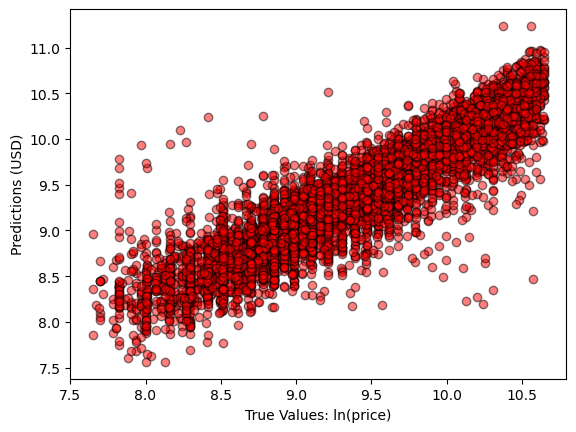

In [93]:
plt.scatter(y_test, test_preds, c='red', alpha=0.5, edgecolors='black')

plt.xlabel('True Values: ln(price)')
plt.ylabel('Predictions (USD)')

plt.show()

### 5. Evaluation

#### 5.1 Permutation Importance of Ridge Model (Numerical Encoding)

In [94]:
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .3)

In [95]:
r = permutation_importance(ridge_grid, X_test, y_test,
                           n_repeats=30,
                           random_state=42,
                           scoring='neg_mean_squared_error')

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns.values[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    0.187 +/- 0.003
odometer0.077 +/- 0.002
model   0.059 +/- 0.001
cylinders0.038 +/- 0.001
drive   0.017 +/- 0.001
type    0.013 +/- 0.001
fuel    0.009 +/- 0.000
condition0.007 +/- 0.000
manufacturer0.006 +/- 0.000
title_status0.004 +/- 0.000
transmission0.003 +/- 0.000
paint_color0.000 +/- 0.000


#### 5.2 Permutation Importance and Regression Coefficients of Ridge Model (One-Hot Encoding)

In [96]:
X = df_cleaned.drop('price', axis = 1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .3)

In [97]:
r = permutation_importance(pipe, X_test, y_test,
                           n_repeats=30,
                           random_state=42,
                           scoring='neg_mean_squared_error')

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns.values[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

year    0.246 +/- 0.003
model   0.157 +/- 0.002
odometer0.083 +/- 0.001
manufacturer0.028 +/- 0.001
type    0.008 +/- 0.000
fuel    0.008 +/- 0.000
cylinders0.005 +/- 0.000
title_status0.004 +/- 0.000
drive   0.003 +/- 0.000
condition0.001 +/- 0.000
transmission0.000 +/- 0.000


In [98]:
coef_df = pd.DataFrame({'Feature': pipe.named_steps.preprocessing.get_feature_names_out(),
                        'Coefficient': pipe.named_steps.ridge.coef_})
coef_df = coef_df.set_index('Feature')

In [99]:
coef_df = coef_df.sort_values('Coefficient', ascending = False)

In [100]:
#10 Highest Coefficients
coef_df.head(10)

,Coefficient
Feature,
year,0.355473
manufacturer_lexus,0.058125
model_corvette,0.045708
fuel_diesel,0.040274
model_silverado 1500,0.039910
model_wrangler,0.038648
type_truck,0.033032
model_silverado 2500hd,0.032292
model_tacoma,0.031203


In [101]:
#10 Lowest Coefficients
coef_df.tail(10)

,Coefficient
Feature,
model_fusion,-0.027493
model_200,-0.027515
model_escape,-0.027751
manufacturer_nissan,-0.027925
model_fiesta,-0.029690
model_cruze,-0.031581
model_focus se,-0.032992
model_focus,-0.043708
manufacturer_lincoln,-0.054010


The permutation importance of the features from the two models presented states that the 3 most relevant features are `year`, `model` and `odometer`.

The analysis of the coefficients from the second ridge model (One-Hot encoding) gives interesting information about the most relevant values. The order of the coefficients agrees with the insights from previous paragraphs.

##### 5 Highest Coefficients (driving price high):
- year
- manufacturer_lexus
- model_corvette
- fuel_diesel
- model_silverado 1500

##### 5 Lowest Coefficients (driving price low):
- odometer
- manufacturer_lincoln
- model_focus
- model_focus
- model_cruze

The coefficients confirm the importance of the features from permutation importance.

### 6. Deployment

The quality of the provided dataset was very low: several missing values and a relevant number of duplicates. This could have influenced the accuracy of the final outcome.

The most impostant features driving the price of a used car are `year`, `odometer` and `model`.

`year`: the analysis focuses on the period 1998-2002. The majority of the cars in the dataset are from 2008 to 2015. The price tends to decay esponentially with the age of the car. According to the esponential trend, I would recommend the seller to not keep in his parking lot many cars built before 2008. Cars built after 2015 are the ones with the higher value and potentially with higher reselling margins. As in the provided dataset, all the cars in the parking lot they have to be in clean conditions.

`odometer`: cars with a significant mileage lose value. A more rigorous analysis should be carried out, but I would consider cars below 65k miles (first quartile of odometer distribution) "low-mileage cars", and car over 140k miles (third quartile of odometer distribution) "high-mileage" cars.

`model`: the specific car model hugely impacts the final price. Even the manufacturer could be considered, these two features are correlated. There are some high selling vehicles (e.g. Chevrolet Silverado 1500 or Ford F-150): this is related to the technical value of these vehicles, but I believe with the customers' perception as well. Some models are particularly popular and tend to keep their value higher. I would recommend the seller to keep more of the popular models, taking advantage of the provided "Top 20 Models" chart. Said list can be useful in two ways: top value models (e.g. GMC Sierra 155, Toyota Tacoma and Chevrolet Silverado 1500) are highly requested and can be sold at high prices. However, cheaper models cannot be neglected: e.g. Corolla, Prius and Civic are much cheaper but still they have a large number of loyal customers.

The developed regression model could be also a useful tool to quantify numerically some "price-groups" for the cars to be sold.

#### Recommended Next Steps

- Improving the quality of the dataset to get more details (less NaN, duplicated items, outliners). This would also provide more available rows, improving the training of the regression models.
- Improving the accuracy of some values in the dataset: many 'other' labels or wrong parameters assigned.
- Better characterization of a price-penalizing coefficient for the odometer.
- Developing a more rigorous market analysis regarding the most requested models.
- Considering more advanced regression models.

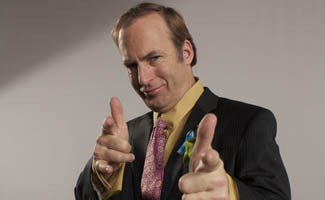